# Machine Learning - Bitcoin prediction test


## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fbprophet import Prophet
from matplotlib import dates
from sklearn import metrics
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor

%matplotlib inline

## Dataset

Bitcoin historical prices dataset from Kaggle:
https://www.kaggle.com/valeriovaccaro/cryptocoinshistoricalprices

In [33]:
data = pd.read_csv("CryptocoinsHistoricalPrices.csv")

Info about data

In [4]:
data.head()

,Unnamed: 0,Date,Open.,High,Low,Close..,Volume,Market.Cap,coin,Open,Close,Delta
0,1,2018-08-14,6287.66,6287.94,5971.05,6199.71,"5,301,700,000","108,199,097,492",BTC,6287.66,6199.71,-0.013988
1,2,2018-08-13,6341.36,6537.05,6225.72,6297.57,"4,083,980,000","109,111,523,954",BTC,6341.36,6297.57,-0.006905
2,3,2018-08-12,6283.65,6409.85,6237.50,6322.69,"5,665,250,000","108,106,451,582",BTC,6283.65,6322.69,0.006213
3,4,2018-08-11,6185.79,6455.74,6109.03,6295.73,"4,047,850,000","106,409,456,302",BTC,6185.79,6295.73,0.017773
4,5,2018-08-10,6571.42,6591.26,6124.52,6184.71,"4,528,680,000","113,028,788,092",BTC,6571.42,6184.71,-0.058847


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826697 entries, 0 to 826696
Data columns (total 12 columns):
Unnamed: 0    826697 non-null int64
Date          826693 non-null object
Open.         826697 non-null object
High          825966 non-null float64
Low           826051 non-null float64
Close..       826697 non-null object
Volume        826697 non-null object
Market.Cap    826697 non-null object
coin          826697 non-null object
Open          826004 non-null float64
Close         826006 non-null float64
Delta         825980 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 75.7+ MB


Data cleanup

In [6]:
btc_data = data.drop([data.columns[0], 'coin', 'Close..', 'Open.'], axis=1).loc[data['coin'] == 'BTC']

btc_data['DateEnum'] = btc_data['Date'].map(lambda date:dates.datestr2num(date))
btc_data['Volume'] = btc_data['Volume'].map(lambda x:x.replace(',',''))
btc_data['Market.Cap'] = btc_data['Market.Cap'].map(lambda x:x.replace(',',''))

btc_data = btc_data.drop(btc_data[(btc_data['Volume'] == '-')].index)
btc_data['Volume'] = btc_data['Volume'].astype('int64', copy=False)
btc_data['Market.Cap'] = btc_data['Market.Cap'].astype('int64', copy=False)

start_date = btc_data[(btc_data['Date'] == '2013-12-27')]['DateEnum'].iloc[0]
btc_data = btc_data.drop(btc_data[(btc_data['DateEnum'] < start_date)].index)

In [7]:
btc_data.head()

,Date,High,Low,Volume,Market.Cap,Open,Close,Delta,DateEnum
0,2018-08-14,6287.94,5971.05,5301700000,108199097492,6287.66,6199.71,-0.013988,736920.0
1,2018-08-13,6537.05,6225.72,4083980000,109111523954,6341.36,6297.57,-0.006905,736919.0
2,2018-08-12,6409.85,6237.50,5665250000,108106451582,6283.65,6322.69,0.006213,736918.0
3,2018-08-11,6455.74,6109.03,4047850000,106409456302,6185.79,6295.73,0.017773,736917.0
4,2018-08-10,6591.26,6124.52,4528680000,113028788092,6571.42,6184.71,-0.058847,736916.0


In [8]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1692 entries, 0 to 1691
Data columns (total 9 columns):
Date          1692 non-null object
High          1692 non-null float64
Low           1692 non-null float64
Volume        1692 non-null int64
Market.Cap    1692 non-null int64
Open          1692 non-null float64
Close         1692 non-null float64
Delta         1692 non-null float64
DateEnum      1692 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 132.2+ KB


### Check the correlation

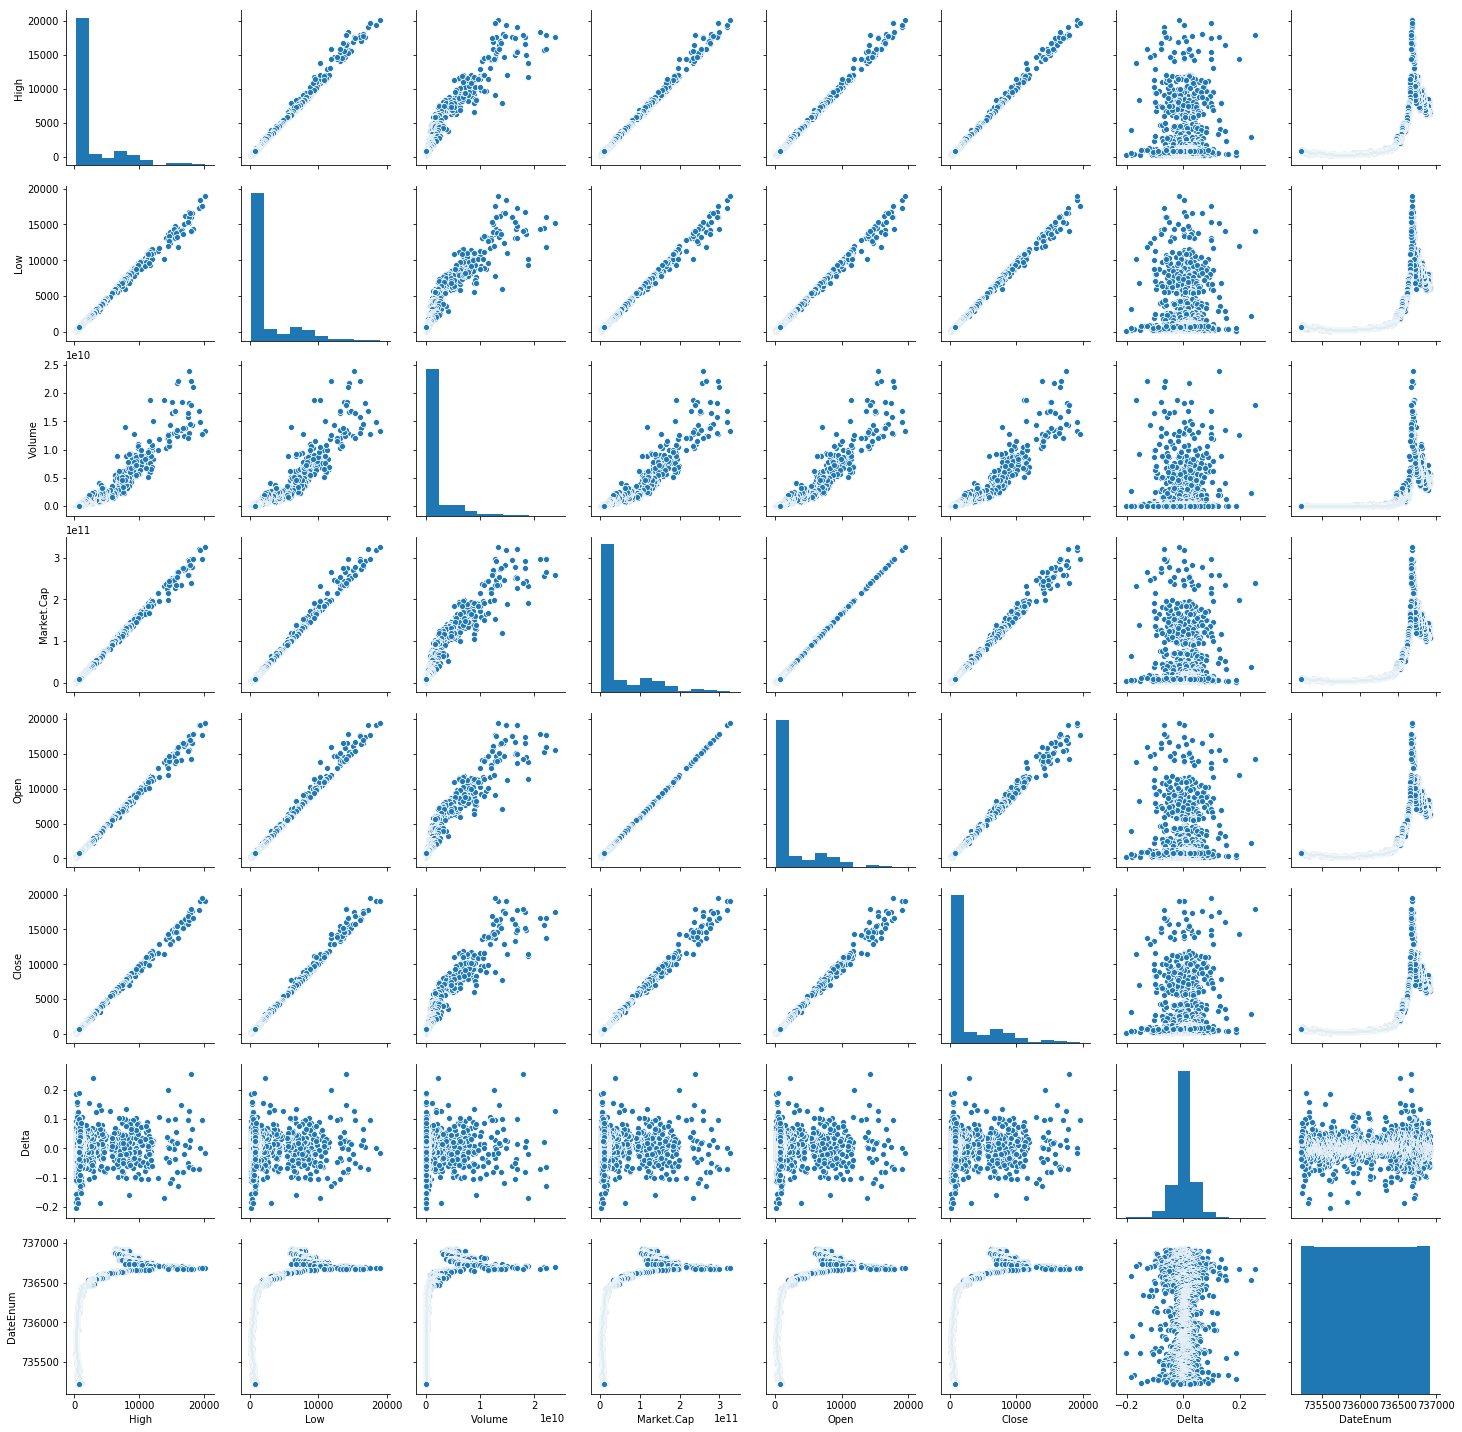

In [9]:
sns.pairplot(btc_data)

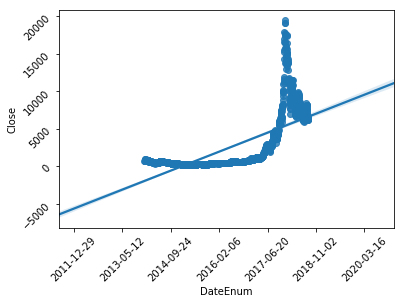

In [10]:
@plt.FuncFormatter
def fake_dates(x, pos):
    return dates.num2date(x).strftime('%Y-%m-%d')

fig, ax = plt.subplots()
sns.regplot('DateEnum', 'Close', data=btc_data, ax=ax)

ax.xaxis.set_major_formatter(fake_dates)
ax.tick_params(labelrotation=45)

## Training and Testing Data

In [11]:
btc_data.columns

Index([u'Date', u'High', u'Low', u'Volume', u'Market.Cap', u'Open', u'Close',
       u'Delta', u'DateEnum'],
      dtype='object')

In [12]:
y = btc_data['Close']

In [13]:
btc_data.columns
X = btc_data[[u'High', u'Low', u'Open', u'DateEnum', u'Volume', u'Market.Cap']]

Split the data into training and testing sets

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=50)

## Training the LinearRegression Model

In [34]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Predicting Test Data

Text(0,0.5,'Predicted Y')

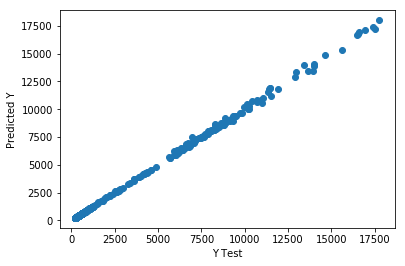

In [17]:
predictions_lm = lm.predict(X_test)
plt.scatter(y_test,predictions_lm)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

## Evaluating the Model

In [18]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions_lm))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lm))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lm)))

('MAE:', 38.446224074445965)
('MSE:', 7850.895940348258)
('RMSE:', 88.60528167298075)


## Residuals

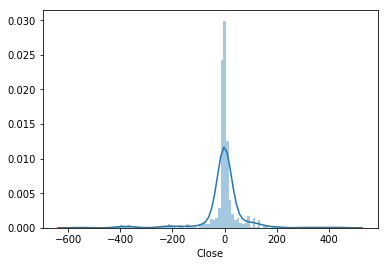

In [19]:
sns.distplot((y_test-predictions_lm),bins=100);

## Conclusion

In [20]:
coeffecients_lm = pd.DataFrame(lm.coef_, X.columns)
coeffecients_lm.columns = ['Coeffecient']
coeffecients_lm

,Coeffecient
High,9.118582e-01
Low,5.368702e-01
Open,-4.702298e-01
DateEnum,2.364578e-02
Volume,1.719316e-08
Market.Cap,-2.753806e-10


Interpreting the coefficients:

- Holding all other features fixed, a 1 day increase is associated with an **increase of $2.364578e-02 Bitcoin Close price**.


## Evaluating multiple models

In [38]:
ransac = RANSACRegressor(LinearRegression(), 
                         max_trials=150, 
                         min_samples=60, 
                         residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
                         residual_threshold=5.0, 
                         random_state=0)

models = [
    ('LR', LinearRegression()), 
    ('RANSAC', ransac),
    ('Lasso', linear_model.Lasso(alpha=0.01)),
    ('Ridge', linear_model.Ridge(alpha = 0.01)),
    ('ElasticNet', linear_model.ElasticNet(alpha = 0.01)),
    ('Quatratic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=2)),
                ('lr', LinearRegression())
            ])),
    ('Cubic', Pipeline([
                ('polyxform', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())
            ])),
    ('Decision Tree', DecisionTreeRegressor(max_depth=3)),
    ('Random Forest', RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)),
]

r2_scores = {}

for label, model in models:
    model.fit(X_train, y_train)
    r2_train = r2_score(y_train, model.predict(X_train))
    r2_test = r2_score(y_test, model.predict(X_test))
    r2_scores[label] = (r2_train, r2_test)
    
scores = pd.DataFrame.from_dict(r2_scores, orient='index')
scores.columns = ['train', 'test']
scores.sort_values(by='test', inplace=True, ascending=False)
scores

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:288: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


,train,test
Quatratic,0.999421,0.999443
Ridge,0.999302,0.999440
LR,0.999302,0.999440
ElasticNet,0.999291,0.999420
Lasso,0.999291,0.999420
RANSAC,0.998641,0.999324
Cubic,0.999273,0.999231
Random Forest,0.999701,0.998021
Decision Tree,0.986466,0.983213


## Prophet forecast

In [23]:
df = btc_data[['Date', 'Close']]
df.columns = ['ds', 'y']
df.head()

,ds,y
0,2018-08-14,6199.71
1,2018-08-13,6297.57
2,2018-08-12,6322.69
3,2018-08-11,6295.73
4,2018-08-10,6184.71


In [40]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=730)
forecast = m.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


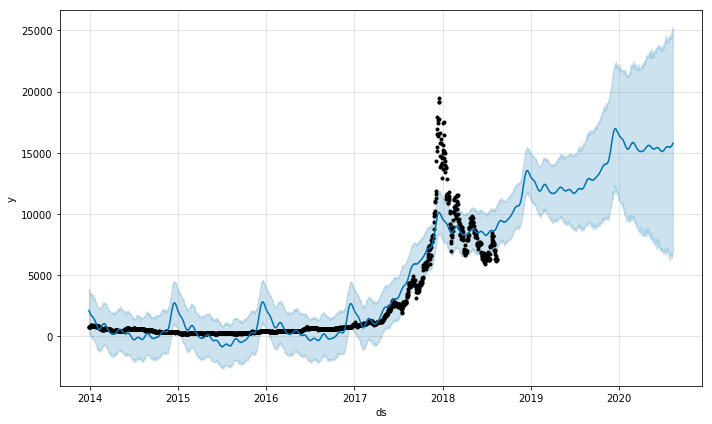

In [31]:
fig1 = m.plot(forecast)

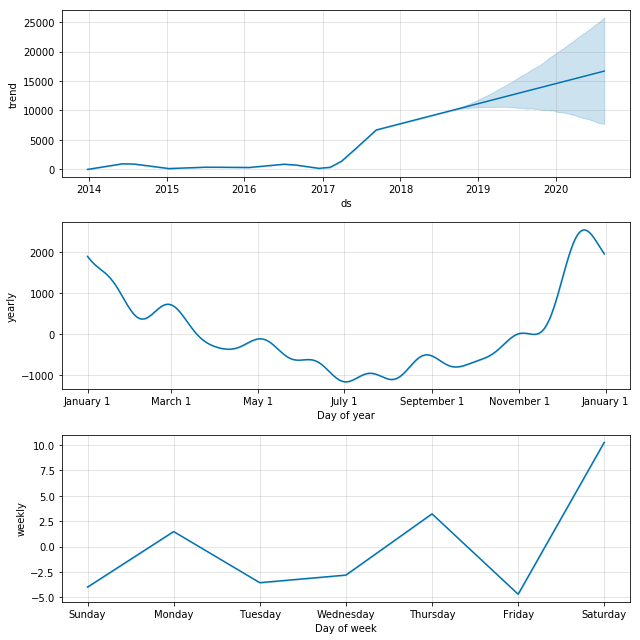

In [32]:
fig2 = m.plot_components(forecast)